In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

<h1>first we have to convert some columns into categorical form to either 0/1 so that they can easily be added into decision making</h1>

In [65]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

In [66]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int8

In [26]:
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

<p>just checking if we have any null value, if yes then first fill missing value</p>

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

by using all the above variables/columns we want to predict charges

<pre><b>Simple linearregression</b>
<h3>y=mx+c
m is slope and c is intercept
The slope indicates the steepness of a line and the intercept indicates the location where it intersects an axis.</h3>
    <h1>Multi linear regression</h1>
   <b> Y=m1X1+m2X2+m3X3......+mnXn+C</b>
</pre>

now we are going to make training and test data so in training only starting 6 columns play roleso


In [27]:
X=df.drop(columns='charges')

In [32]:
X

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]

In [33]:
Y=df['charges']

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)#random_state 0shows that each time your data set should be divided same when you rerun code if i take it 20 then each time training and testing data values will be different


In [37]:
x_train

age  sex     bmi  children  smoker  region
1163   18    0  28.215         0       0       0
196    39    0  32.800         0       0       3
438    52    0  46.750         5       0       2
183    44    0  26.410         0       0       1
1298   33    1  27.455         2       0       1
...   ...  ...     ...       ...     ...     ...
763    27    1  26.030         0       0       0
835    42    1  35.970         2       0       2
1216   40    1  25.080         0       0       2
559    19    1  35.530         0       0       1
684    33    0  18.500         1       0       3

[936 rows x 6 columns]

In [38]:
x_test

age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1
...   ...  ...     ...       ...     ...     ...
1261   28    1  37.100         1       0       3
494    21    1  25.700         4       1       3
97     55    1  38.280         0       0       2
418    64    1  39.160         1       0       2
920    62    0  25.000         0       0       3

[402 rows x 6 columns]

In [39]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1261     3277.16100
494     17942.10600
97      10226.28420
418     14418.28040
920     13451.12200
Name: charges, Length: 402, dtype: float64

In [40]:
y_train

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 936, dtype: float64

In [41]:
print("x_train shape:",x_train.shape)
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (936, 6)
x_test shape: (402, 6)
y_train shape: (936,)
y_test shape: (402,)


In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
c=lr.intercept_
c

-11827.733141795692

In [47]:
m=lr.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [49]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

Text(0, 0.5, 'predicted')

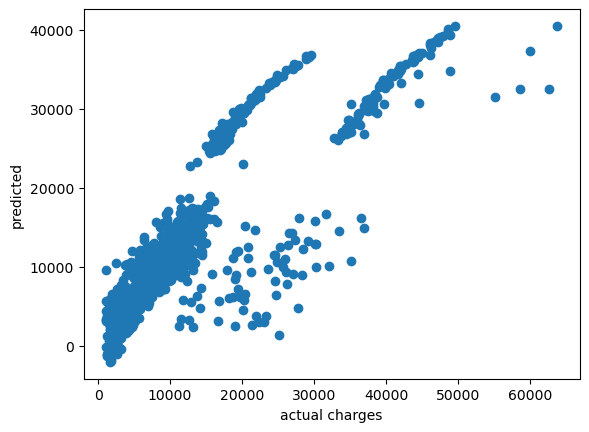

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel("actual charges")
plt.ylabel("predicted")

In [56]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_train,y_pred_train)#nearto 1 is good

0.7306840408360218

In [60]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

In [61]:
r2_score(y_test,y_pred_test)#nearto 1 is good

0.7911113876316933

In [68]:
# Predict the value for a new person
import numpy as np
X_new = np.array([[32,0,27.9,1,0,1]])  # Note the double brackets to make it 2D
y_pred = lr.predict(X_new)
y_pred

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5765.27293147])